### NAME: Souri Rishik Volety
### Reg No: 230968004

# DATASET 1 - CHURN MODELLING
Link - https://www.kaggle.com/datasets/aakash50897/churn-modellingcsv 

### 1. Pre-processing Steps  
- Handle missing data by imputing missing values with the mean of respective features.  
- Split the dataset into training, validation, and testing sets with ratio 80:10:10.  
- Normalize the feature values using StandardScaler to have zero mean and unit variance.

---

### 2. Experimental Setup

| Number of Hidden Layers | Number of Units per Layer    |
|------------------------:|-----------------------------|
| 1                       | 128, 0, 0                   |
| 2                       | 128, 64, 0                  |
| 3                       | 128, 64, 32                 |

- **Epochs:** 10, 20, 30  
- **Activation Functions:** Sigmoid, ReLU  
- **Regularization:** None, L1, L2  
- **Learning Rates:** 0.1, 0.01, 0.001  

---

### 3. Visualization  
Visualize the training and validation loss vs epochs for each run to analyze performance and choose optimal hyperparameters.

---

### 4. Performance Metrics  
Evaluate models based on **Accuracy**, **Precision**, and **Recall** on the test set.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam

import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True) # these features are unrelavent for training the model
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender']) # Male and Female here we are encoding into 0 and 1 using Label encoder

data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# dividing in to columns X and Y
X = data.drop('Exited', axis=1)
y = data['Exited']

#scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#train and test split
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


In [6]:
layers_units_list = {
    1: [128, 0, 0],
    2: [128, 64, 0],
    3: [128, 64, 32]
}

epoch_list = [10, 20, 30]
activations = ['sigmoid', 'relu']
regularizations = [None, 'l1', 'l2']
learning_rates = [0.1, 0.01, 0.001]

results = []


Training: Layers=1, Epochs=10, Activation=sigmoid, Reg=None, LR=0.1


2025-08-07 09:08:48.828871: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-07 09:08:48.845414: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-07 09:08:48.845558: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

32/32 [==============================] - 0s 637us/step

Training: Layers=1, Epochs=10, Activation=sigmoid, Reg=None, LR=0.01
32/32 [==============================] - 0s 596us/step

Training: Layers=1, Epochs=10, Activation=sigmoid, Reg=None, LR=0.001
32/32 [==============================] - 0s 581us/step

Training: Layers=1, Epochs=10, Activation=sigmoid, Reg=l1, LR=0.1
32/32 [==============================] - 0s 483us/step

Training: Layers=1, Epochs=10, Activation=sigmoid, Reg=l1, LR=0.01
32/32 [==============================] - 0s 620us/step

Training: Layers=1, Epochs=10, Activation=sigmoid, Reg=l1, LR=0.001
32/32 [==============================] - 0s 442us/step

Training: Layers=1, Epochs=10, Activation=sigmoid, Reg=l2, LR=0.1
32/32 [==============================] - 0s 507us/step

Training: Layers=1, Epochs=10, Activation=sigmoid, Reg=l2, LR=0.01
32/32 [==============================] - 0s 612us/step

Training: Layers=1, Epochs=10, Activation=sigmoid, Reg=l2, LR=0.001
32/32 [====

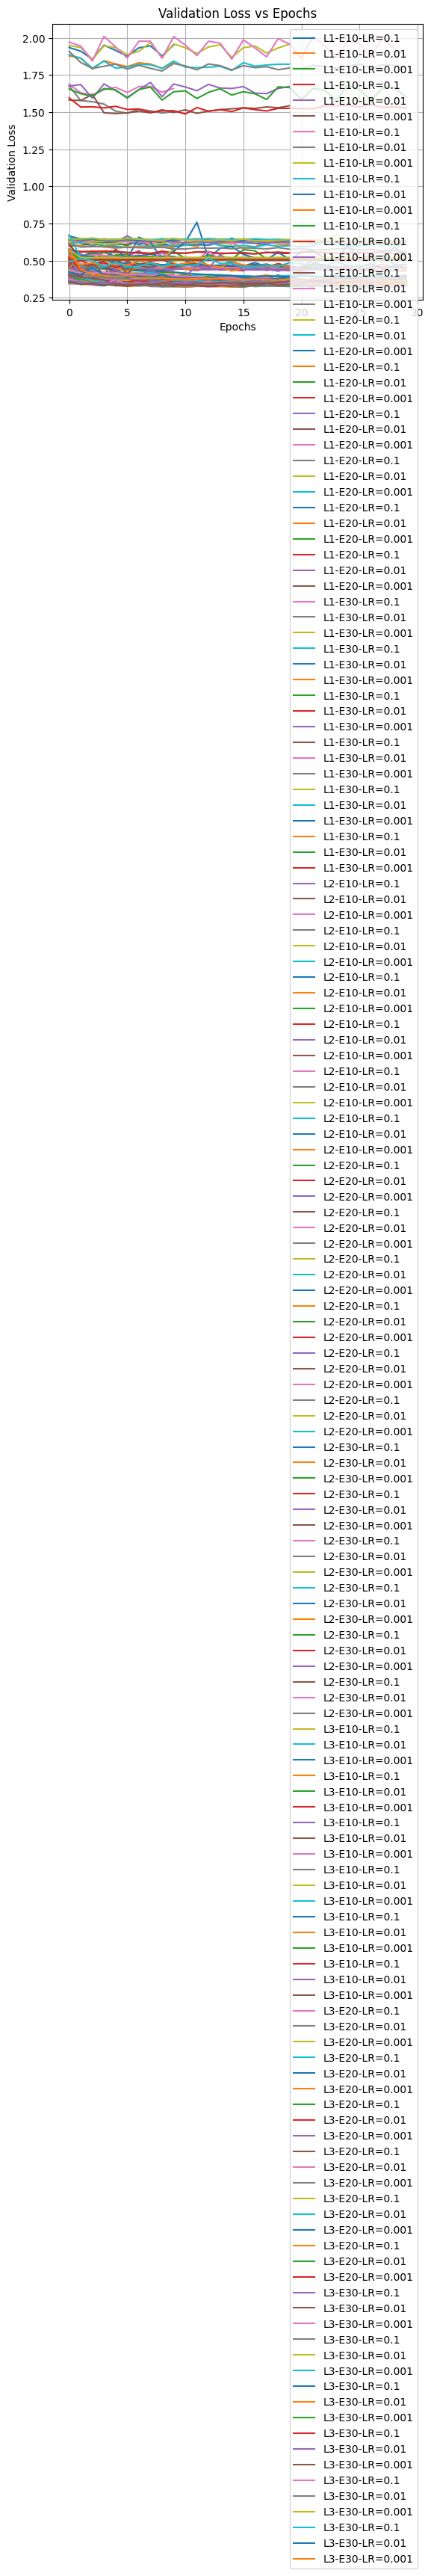

In [7]:
for num_layers, units in layers_units_list.items():
    for epochs in epoch_list:
        for activation in activations:
            for reg in regularizations:
                for lr in learning_rates:
                    print(f'\nTraining: Layers={num_layers}, Epochs={epochs}, Activation={activation}, Reg={reg}, LR={lr}')

                    model = Sequential()

                    for i in range(num_layers):
                        if units[i] == 0:
                            continue

                        kwargs = {
                            'units': units[i],
                            'activation': activation,
                            'input_dim': X_train.shape[1] if i == 0 else None,
                        }

                        if reg == 'l1':
                            kwargs['kernel_regularizer'] = l1(0.01)
                        elif reg == 'l2':
                            kwargs['kernel_regularizer'] = l2(0.01)

                        model.add(Dense(**{k: v for k, v in kwargs.items() if v is not None}))

                    model.add(Dense(1, activation='sigmoid'))

                    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

                    history = model.fit(
                        X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        verbose=0
                    )

                    y_pred = (model.predict(X_test) > 0.5).astype("int32")
                    acc = accuracy_score(y_test, y_pred)
                    prec = precision_score(y_test, y_pred)
                    rec = recall_score(y_test, y_pred)

                    results.append({
                        'Layers': num_layers,
                        'Units': str(units),
                        'Epochs': epochs,
                        'Activation': activation,
                        'Regularization': reg if reg else 'None',
                        'LearningRate': lr,
                        'Accuracy': acc,
                        'Precision': prec,
                        'Recall': rec
                    })

                    plt.plot(history.history['val_loss'], label=f'L{num_layers}-E{epochs}-LR={lr}')

plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
model.summary()

Model: "sequential_161"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_482 (Dense)           (None, 128)               1536      
                                                                 
 dense_483 (Dense)           (None, 64)                8256      
                                                                 
 dense_484 (Dense)           (None, 32)                2080      
                                                                 
 dense_485 (Dense)           (None, 1)                 33        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='Accuracy', ascending=False)

,Layers,Units,Epochs,Activation,Regularization,LearningRate,Accuracy,Precision,Recall
36,1,"[128, 0, 0]",30,sigmoid,None,0.100,0.866,0.744681,0.517241
16,1,"[128, 0, 0]",10,relu,l2,0.010,0.865,0.742857,0.512315
74,2,"[128, 64, 0]",20,sigmoid,None,0.001,0.863,0.761905,0.472906
28,1,"[128, 0, 0]",20,relu,None,0.010,0.862,0.809524,0.418719
46,1,"[128, 0, 0]",30,relu,None,0.010,0.862,0.764228,0.463054
...,...,...,...,...,...,...,...,...,...
24,1,"[128, 0, 0]",20,sigmoid,l2,0.100,0.792,0.407407,0.054187
42,1,"[128, 0, 0]",30,sigmoid,l2,0.100,0.791,0.473684,0.266010
140,3,"[128, 64, 32]",20,relu,l1,0.001,0.790,0.458824,0.192118
66,2,"[128, 64, 0]",10,relu,l1,0.100,0.786,0.458015,0.295567


# DATASET 2 - BOSTON HOUSING DATASET 

Build a neural network to predict the median house value (MEDV) using the given features from the Boston Housing dataset.

### Design Choices and Hyperparameters:

- **Data Split:** Training : Validation : Testing = 80 : 10 : 10  
- **Data Preprocessing:** Normalize features using StandardScaler  
- **Model Architecture:**  
  - Number of Hidden Layers = 3  
  - Units per Hidden Layer = 128, 64, 32 respectively  
- **Epochs:** 10, 20, 30  
- **Activation Functions:** Sigmoid, ReLU  
- **Regularization:** None, L1, L2  
- **Learning Rates:** 0.1, 0.01, 0.001  

---

### Experiment Goals:

- Train models with different hyperparameter combinations from the above list.  
- Visualize training and validation loss versus epochs for each run.  
- Analyze the plots to comment on optimal hyperparameter choices for the task.


In [17]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [18]:
boston = pd.read_csv('HousingData.csv')
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [19]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [21]:
boston.fillna(boston.mean(), inplace=True)
X = boston.drop(columns=['MEDV'])
y = boston['MEDV']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [22]:
num_layers = 3
layers_units = [128, 64, 32]
epochs_list = [10, 20, 30]
activations = ['sigmoid', 'relu']
regularizations = [None, 'l1', 'l2']
learning_rates = [0.1, 0.01, 0.001]

results = []
plot_labels = []
plot_data = []


Training: Layers=3, Epochs=10, Activation=sigmoid, Regularization=None, LR=0.1
  Adding Layer 1 with 128 units
  Adding Layer 2 with 64 units
  Adding Layer 3 with 32 units
2/2 [==============================] - 0s 2ms/step

Training: Layers=3, Epochs=10, Activation=sigmoid, Regularization=None, LR=0.01
  Adding Layer 1 with 128 units
  Adding Layer 2 with 64 units
  Adding Layer 3 with 32 units
2/2 [==============================] - 0s 1ms/step

Training: Layers=3, Epochs=10, Activation=sigmoid, Regularization=None, LR=0.001
  Adding Layer 1 with 128 units
  Adding Layer 2 with 64 units
  Adding Layer 3 with 32 units
2/2 [==============================] - 0s 2ms/step

Training: Layers=3, Epochs=10, Activation=sigmoid, Regularization=l1, LR=0.1
  Adding Layer 1 with 128 units
  Adding Layer 2 with 64 units
  Adding Layer 3 with 32 units
2/2 [==============================] - 0s 2ms/step

Training: Layers=3, Epochs=10, Activation=sigmoid, Regularization=l1, LR=0.01
  Adding Layer 1 wit

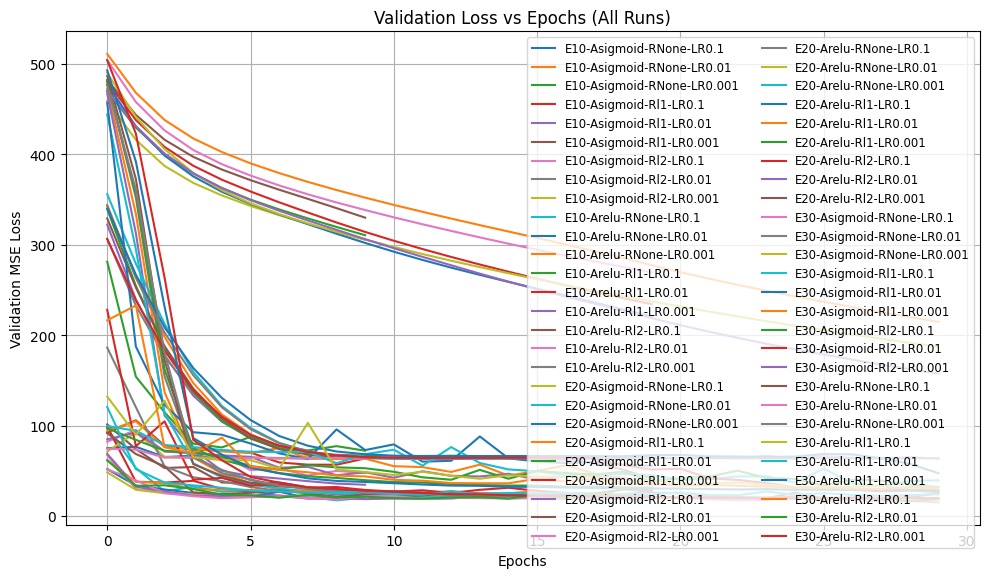

In [23]:
for epochs in epochs_list:
    for activation in activations:
        for reg in regularizations:
            for lr in learning_rates:
                print(f"\nTraining: Layers={num_layers}, Epochs={epochs}, Activation={activation}, Regularization={reg}, LR={lr}")

                model = Sequential()
                for i, units in enumerate(layers_units):
                    print(f"  Adding Layer {i+1} with {units} units")
                    kwargs = {'units': units, 'activation': activation}
                    if i == 0:
                        kwargs['input_dim'] = X_train.shape[1]
                    if reg == 'l1':
                        kwargs['kernel_regularizer'] = l1(0.01)
                    elif reg == 'l2':
                        kwargs['kernel_regularizer'] = l2(0.01)

                    model.add(Dense(**kwargs))

                model.add(Dense(1))

                model.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['mae'])

                history = model.fit(
                    X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=epochs,
                    verbose=0
                )

                y_pred = model.predict(X_test).flatten()
                mse = np.mean((y_test - y_pred) ** 2)
                mae = np.mean(np.abs(y_test - y_pred))

                results.append({
                    'Layers': num_layers,
                    'Epochs': epochs,
                    'Activation': activation,
                    'Regularization': reg if reg else 'None',
                    'LearningRate': lr,
                    'MSE': mse,
                    'MAE': mae
                })

                plot_labels.append(f"E{epochs}-A{activation}-R{reg}-LR{lr}")
                plot_data.append(history.history['val_loss'])

plt.figure(figsize=(10, 6))
for val_loss, label in zip(plot_data, plot_labels):
    plt.plot(val_loss, label=label)

plt.title('Validation Loss vs Epochs (All Runs)')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE Loss')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='MSE', ascending=True)

,Layers,Epochs,Activation,Regularization,LearningRate,MSE,MAE
46,3,30,relu,None,0.010,6.408556,1.929162
50,3,30,relu,l1,0.001,6.490125,1.924184
15,3,10,relu,l2,0.100,6.874469,1.850999
52,3,30,relu,l2,0.010,6.934038,1.910054
34,3,20,relu,l2,0.010,7.042666,1.956749
51,3,30,relu,l2,0.100,7.491119,2.013986
13,3,10,relu,l1,0.010,7.517042,2.054093
48,3,30,relu,l1,0.100,7.601100,2.182048
30,3,20,relu,l1,0.100,7.810997,2.129639
31,3,20,relu,l1,0.010,7.889794,2.111903


In [27]:
model.summary()

Model: "sequential_215"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_698 (Dense)           (None, 128)               1792      
                                                                 
 dense_699 (Dense)           (None, 64)                8256      
                                                                 
 dense_700 (Dense)           (None, 32)                2080      
                                                                 
 dense_701 (Dense)           (None, 1)                 33        
                                                                 
Total params: 12161 (47.50 KB)
Trainable params: 12161 (47.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
